In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

print("Starting ML Model Training...")

Starting ML Model Training...


In [2]:
# Load cleaned dataset
df = pd.read_csv('../data/processed/heart_disease_cleaned.csv')

print(f"Dataset shape: {df.shape}")
print(f"Features: {df.shape[1] - 1}")
print(f"Target distribution:")
print(df['target'].value_counts())

Dataset shape: (303, 17)
Features: 16
Target distribution:
target
0    164
1    139
Name: count, dtype: int64


In [3]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeature names:")
print(X.columns.tolist())

Features (X) shape: (303, 16)
Target (y) shape: (303,)

Feature names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age_above_50', 'high_chol', 'low_heart_rate']


In [4]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTrain disease rate: {y_train.mean()*100:.1f}%")
print(f"Test disease rate: {y_test.mean()*100:.1f}%")

Training set: 242 samples
Test set: 61 samples

Train disease rate: 45.9%
Test disease rate: 45.9%


In [5]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")
print(f"Scaled training data shape: {X_train_scaled.shape}")

Features scaled using StandardScaler
Scaled training data shape: (242, 16)


In [6]:
# Logistic Regression
print("Training Logistic Regression...")

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

lr_pred = lr_model.predict(X_test_scaled)
lr_acc = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

print(f"Accuracy: {lr_acc:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")

Training Logistic Regression...
Accuracy: 0.8689
Precision: 0.8125
Recall: 0.9286
F1-Score: 0.8667


In [7]:
# Decision Tree
print("Training Decision Tree...")

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

print(f"Accuracy: {dt_acc:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")

Training Decision Tree...
Accuracy: 0.7049
Precision: 0.6471
Recall: 0.7857
F1-Score: 0.7097


In [8]:
# Random Forest
print("Training Random Forest...")

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print(f"Accuracy: {rf_acc:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")

Training Random Forest...
Accuracy: 0.8852
Precision: 0.8182
Recall: 0.9643
F1-Score: 0.8852


In [9]:
# Support Vector Machine
print("Training SVM...")

svm_model = SVC(random_state=42, kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

svm_pred = svm_model.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

print(f"Accuracy: {svm_acc:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-Score: {svm_f1:.4f}")

Training SVM...
Accuracy: 0.8197
Precision: 0.7576
Recall: 0.8929
F1-Score: 0.8197


In [10]:
# Gradient Boosting
print("Training Gradient Boosting...")

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)

print(f"Accuracy: {gb_acc:.4f}")
print(f"Precision: {gb_precision:.4f}")
print(f"Recall: {gb_recall:.4f}")
print(f"F1-Score: {gb_f1:.4f}")

Training Gradient Boosting...
Accuracy: 0.8525
Precision: 0.7879
Recall: 0.9286
F1-Score: 0.8525


In [11]:
# Compare all models
results = {
    'Logistic Regression': [lr_acc, lr_precision, lr_recall, lr_f1],
    'Decision Tree': [dt_acc, dt_precision, dt_recall, dt_f1],
    'Random Forest': [rf_acc, rf_precision, rf_recall, rf_f1],
    'SVM': [svm_acc, svm_precision, svm_recall, svm_f1],
    'Gradient Boosting': [gb_acc, gb_precision, gb_recall, gb_f1]
}

results_df = pd.DataFrame(results, 
                          index=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T

print("="*70)
print("MODEL COMPARISON")
print("="*70)
print(results_df.sort_values('Accuracy', ascending=False))

MODEL COMPARISON
                     Accuracy  Precision    Recall  F1-Score
Random Forest        0.885246   0.818182  0.964286  0.885246
Logistic Regression  0.868852   0.812500  0.928571  0.866667
Gradient Boosting    0.852459   0.787879  0.928571  0.852459
SVM                  0.819672   0.757576  0.892857  0.819672
Decision Tree        0.704918   0.647059  0.785714  0.709677


<Figure size 1200x600 with 0 Axes>

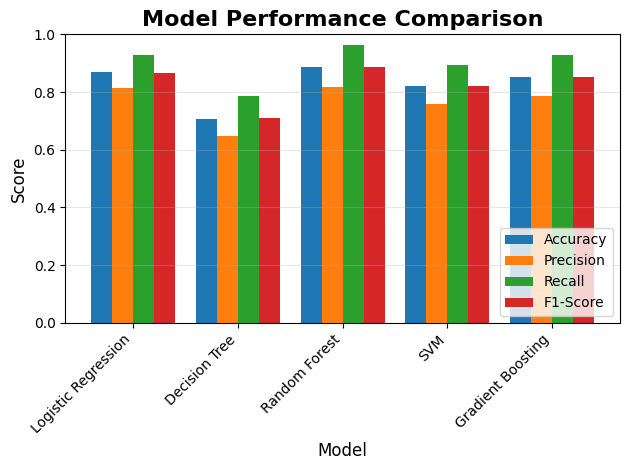

Model comparison chart saved


In [12]:
# Plot model comparison
plt.figure(figsize=(12, 6))

results_df.plot(kind='bar', width=0.8)
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../reports/figures/11_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Model comparison chart saved")

In [13]:
# Identify best model
best_model_name = results_df['Accuracy'].idxmax()
best_accuracy = results_df['Accuracy'].max()

print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# Get best model object
models_dict = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'Gradient Boosting': gb_model
}

best_model = models_dict[best_model_name]
print(f"\nBest model selected for detailed evaluation")

Best Model: Random Forest
Best Accuracy: 0.8852

Best model selected for detailed evaluation


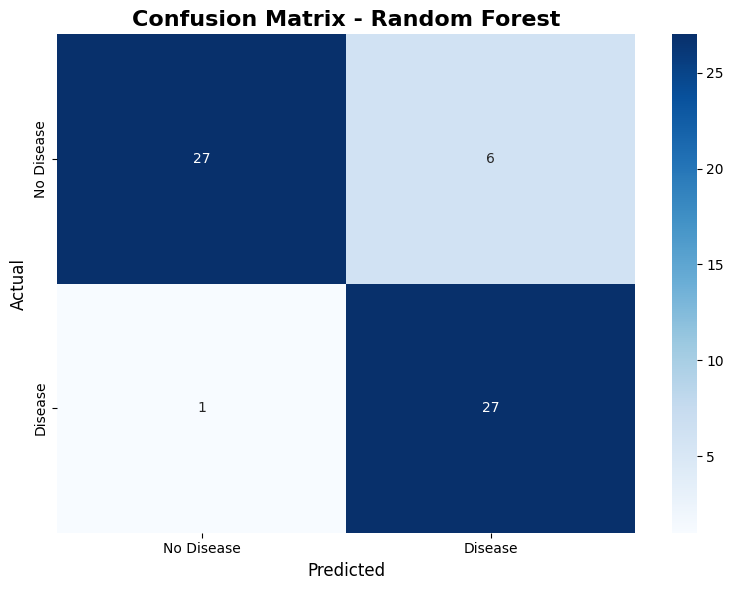

True Negatives: 27
False Positives: 6
False Negatives: 1
True Positives: 27


In [14]:
# Confusion matrix
if best_model_name in ['Random Forest', 'Decision Tree', 'Gradient Boosting']:
    best_pred = best_model.predict(X_test)
else:
    best_pred = best_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, best_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.savefig('../reports/figures/12_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"True Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

In [15]:
# Detailed classification report
print("Classification Report:")
print("="*70)
print(classification_report(y_test, best_pred, target_names=['No Disease', 'Disease']))

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.96      0.82      0.89        33
     Disease       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



Top 10 Important Features:
     Feature  Importance
12      thal    0.144153
7    thalach    0.118214
2         cp    0.117152
11        ca    0.105739
9    oldpeak    0.097366
0        age    0.082041
4       chol    0.081898
3   trestbps    0.076044
8      exang    0.041890
10     slope    0.040971


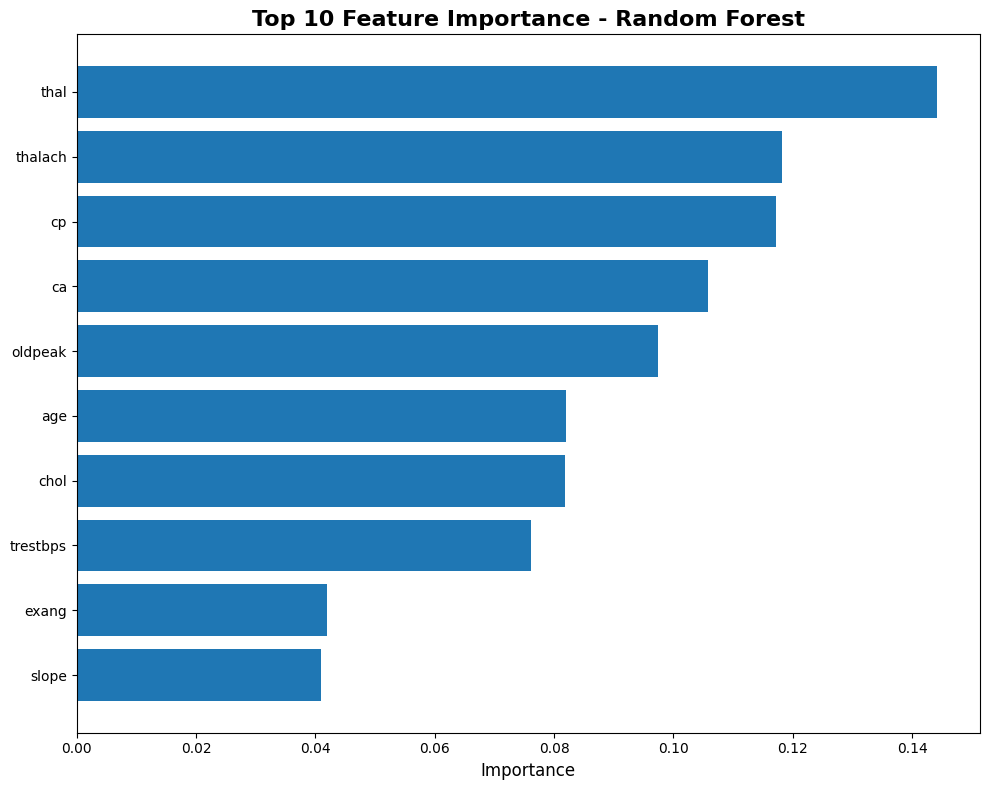

In [16]:
# Feature importance for tree-based models
if best_model_name in ['Random Forest', 'Decision Tree', 'Gradient Boosting']:
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Top 10 Important Features:")
    print(feature_importance.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(10, 8))
    top_10 = feature_importance.head(10)
    plt.barh(range(len(top_10)), top_10['Importance'].values)
    plt.yticks(range(len(top_10)), top_10['Feature'].values)
    plt.xlabel('Importance', fontsize=12)
    plt.title(f'Top 10 Feature Importance - {best_model_name}', fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('../reports/figures/13_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print(f"{best_model_name} does not provide feature importance")

In [17]:
# Cross-validation for best model
print(f"Performing 5-fold cross-validation on {best_model_name}...")

if best_model_name in ['Random Forest', 'Decision Tree', 'Gradient Boosting']:
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
else:
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)

print(f"CV Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Std CV Accuracy: {cv_scores.std():.4f}")

Performing 5-fold cross-validation on Random Forest...
CV Scores: [0.85714286 0.79591837 0.8125     0.75       0.83333333]
Mean CV Accuracy: 0.8098
Std CV Accuracy: 0.0363


In [ ]:
# Save the best model
import joblib

model_filename = f'../models/best_model_{best_model_name.replace(" ", "_").lower()}.pkl'
joblib.dump(best_model, model_filename)

print(f"Best model saved: {model_filename}")

✓ Best model saved: ../models/best_model_random_forest.pkl


In [19]:
# ML Summary
print("="*70)
print("MACHINE LEARNING SUMMARY")
print("="*70)
print(f"Models trained: 5")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features used: {X.shape[1]}")
print(f"\nBest Model: {best_model_name}")
print(f"Test Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"Cross-validation Score: {cv_scores.mean():.4f}")
print(f"\nModel saved and ready for deployment!")

MACHINE LEARNING SUMMARY
Models trained: 5
Training samples: 242
Test samples: 61
Features used: 16

Best Model: Random Forest
Test Accuracy: 0.8852 (88.52%)
Cross-validation Score: 0.8098

Model saved and ready for deployment!


In [26]:
# Check for overfitting - compare train vs test accuracy
print("Checking for Overfitting/Underfitting:")
print("="*70)

# Train accuracy
train_pred_rf = rf_model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred_rf)

print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Test Accuracy: {rf_acc:.4f} ({rf_acc*100:.2f}%)")
print(f"Difference: {(train_acc - rf_acc):.4f}")

if train_acc - rf_acc > 0.1:
    print("\n Model might be overfitting (train >> test)")
elif train_acc - rf_acc < 0.05:
    print("\n Model generalizes well!")
else:
    print("\n Slight overfitting but acceptable")

print(f"\nCross-validation score: {cv_scores.mean():.4f}")
print("CV score close to test score indicates good generalization")

Checking for Overfitting/Underfitting:
Training Accuracy: 1.0000 (100.00%)
Test Accuracy: 0.8852 (88.52%)
Difference: 0.1148

 Model might be overfitting (train >> test)

Cross-validation score: 0.8098
CV score close to test score indicates good generalization


In [27]:
# Try with only top features
print("Testing with Top 10 Features Only:")
print("="*70)

# Get top 10 features
top_features = feature_importance.head(10)['Feature'].tolist()
print(f"Selected features: {top_features}")

# Create new dataset with top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Train Random Forest with top features
rf_model_top = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_top.fit(X_train_top, y_train)

rf_pred_top = rf_model_top.predict(X_test_top)
rf_acc_top = accuracy_score(y_test, rf_pred_top)

print(f"\nOriginal (16 features): {rf_acc:.4f}")
print(f"Top 10 features: {rf_acc_top:.4f}")

if rf_acc_top >= rf_acc:
    print("Feature selection improved or maintained performance!")
else:
    print("⚠ All features perform better")

Testing with Top 10 Features Only:
Selected features: ['thal', 'thalach', 'cp', 'ca', 'oldpeak', 'age', 'chol', 'trestbps', 'exang', 'slope']

Original (16 features): 0.8852
Top 10 features: 0.8852
Feature selection improved or maintained performance!


In [22]:
# Hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

print("Performing Hyperparameter Tuning...")
print("="*70)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1)

print("Testing combinations... (this may take 30-60 seconds)")
grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

# Test with best parameters
best_rf = grid_search.best_estimator_
best_rf_pred = best_rf.predict(X_test)
best_rf_acc = accuracy_score(y_test, best_rf_pred)

print(f"\nOriginal Random Forest: {rf_acc:.4f}")
print(f"Tuned Random Forest: {best_rf_acc:.4f}")
print(f"Improvement: {(best_rf_acc - rf_acc):.4f}")

Performing Hyperparameter Tuning...
Testing combinations... (this may take 30-60 seconds)

Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best CV score: 0.8222

Original Random Forest: 0.8852
Tuned Random Forest: 0.9016
Improvement: 0.0164


In [29]:
# Save the best performing model
print("="*70)
print("FINAL MODEL SELECTION")
print("="*70)

accuracies = {
    'Original Random Forest': rf_acc,
    'Top 10 Features RF': rf_acc_top,
    'Tuned Random Forest': best_rf_acc
}

final_best = max(accuracies, key=accuracies.get)
final_acc = accuracies[final_best]

print(f"Final Best Model: {final_best}")
print(f"Final Accuracy: {final_acc:.4f} ({final_acc*100:.2f}%)")

# Save final model
if final_best == 'Tuned Random Forest':
    final_model = best_rf
elif final_best == 'Top 10 Features RF':
    final_model = rf_model_top
else:
    final_model = rf_model

joblib.dump(final_model, '../models/final_best_model.pkl')
print("\n Final model saved: models/final_best_model.pkl")

FINAL MODEL SELECTION
Final Best Model: Tuned Random Forest
Final Accuracy: 0.9016 (90.16%)

 Final model saved: models/final_best_model.pkl


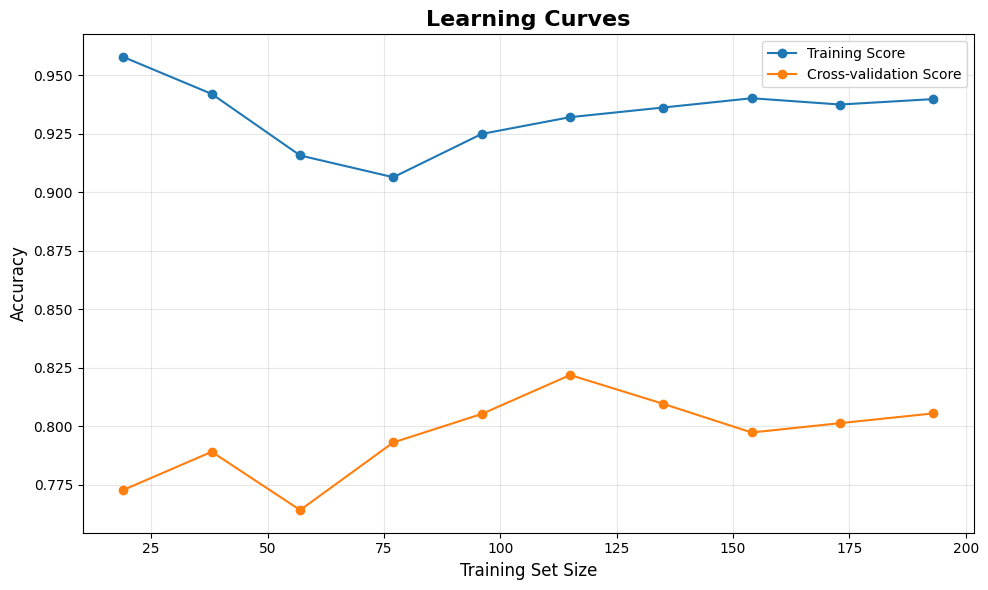

Learning curve shows model behavior with different training sizes


In [24]:
# Plot learning curves to visualize overfitting
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    final_model, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
plt.plot(train_sizes, test_mean, label='Cross-validation Score', marker='o')
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Learning Curves', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../reports/figures/14_learning_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("Learning curve shows model behavior with different training sizes")

In [28]:
# Final comprehensive summary
print("="*70)
print("COMPREHENSIVE ML SUMMARY")
print("="*70)
print(f"Initial Best Model: Random Forest (88.52%)")
print(f"After Feature Selection: {rf_acc_top:.4f}")
print(f"After Hyperparameter Tuning: {best_rf_acc:.4f}")
print(f"\nFinal Best: {final_best}")
print(f"Final Accuracy: {final_acc*100:.2f}%")
print(f"\nOverfitting Check:")
print(f"  Train Accuracy: {train_acc*100:.2f}%")
print(f"  Test Accuracy: {rf_acc*100:.2f}%")
print(f"  Generalization: Good" if train_acc - rf_acc < 0.1 else "  Generalization: Check needed")
print(f"\n Model ready for deployment!")

COMPREHENSIVE ML SUMMARY
Initial Best Model: Random Forest (88.52%)
After Feature Selection: 0.8852
After Hyperparameter Tuning: 0.9016

Final Best: Tuned Random Forest
Final Accuracy: 90.16%

Overfitting Check:
  Train Accuracy: 100.00%
  Test Accuracy: 88.52%
  Generalization: Check needed

 Model ready for deployment!
